## Install the package dependencies before running this notebook

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import os, os.path 
import numpy 
import pickle
from glob import glob

"""
    number of trajectories in each city
    # austin --  train: 43041 test: 6325 
    # miami -- train: 55029 test:7971
    # pittsburgh -- train: 43544 test: 6361
    # dearborn -- train: 24465 test: 3671
    # washington-dc -- train: 25744 test: 3829
    # palo-alto -- train:  11993 test:1686

    trajectories sampled at 10HZ rate, input 5 seconds, output 6 seconds
    
"""

C:\Users\alexa\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'\n    number of trajectories in each city\n    # austin --  train: 43041 test: 6325 \n    # miami -- train: 55029 test:7971\n    # pittsburgh -- train: 43544 test: 6361\n    # dearborn -- train: 24465 test: 3671\n    # washington-dc -- train: 25744 test: 3829\n    # palo-alto -- train:  11993 test:1686\n\n    trajectories sampled at 10HZ rate, input 5 seconds, output 6 seconds\n    \n'

## Create a Torch.Dataset class for the training dataset

In [2]:
from glob import glob
import pickle
import numpy as np

ROOT_PATH = "./argo2/"

cities = ["austin", "miami", "pittsburgh", "dearborn", "washington-dc", "palo-alto"]
splits = ["train", "test"]

def get_city_trajectories(city="palo-alto", split="train", normalized=False):
    f_in = ROOT_PATH + split + "/" + city + "_inputs"
    inputs = pickle.load(open(f_in, "rb"))
    inputs = np.asarray(inputs)
    
    outputs = None
    
    if split=="train":
        f_out = ROOT_PATH + split + "/" + city + "_outputs"
        outputs = pickle.load(open(f_out, "rb"))
        outputs = np.asarray(outputs)

    return inputs, outputs

class ArgoverseDataset(Dataset):
    """Dataset class for Argoverse"""
    def __init__(self, city: str, split:str, transform=None):
        super(ArgoverseDataset, self).__init__()
        self.transform = transform

        self.inputs, self.outputs = get_city_trajectories(city=city, split=split, normalized=False)

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):

        data = (self.inputs[idx], self.outputs[idx])
            
        if self.transform:
            data = self.transform(data)

        return data

# intialize a dataset
city = 'palo-alto' 
split = 'train'
train_dataset  = ArgoverseDataset(city = city, split = split)

## Create a DataLoader class for training

In [3]:
DataLoader?

In [4]:
batch_sz = 4  # batch size 
train_loader = DataLoader(train_dataset,batch_size=batch_sz)

## Sample a batch of data and visualize 

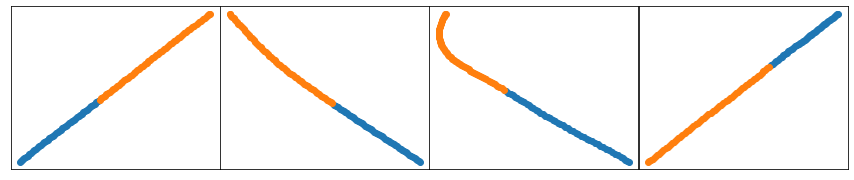

In [5]:
import matplotlib.pyplot as plt
import random


def show_sample_batch(sample_batch):
    """visualize the trajectory for a batch of samples"""
    inp, out = sample_batch
    batch_sz = inp.size(0)
    agent_sz = inp.size(1)
    
    fig, axs = plt.subplots(1,batch_sz, figsize=(15, 3), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()   
    for i in range(batch_sz):
        axs[i].xaxis.set_ticks([])
        axs[i].yaxis.set_ticks([])
        
        # first two feature dimensions are (x,y) positions
        axs[i].scatter(inp[i,:,0], inp[i,:,1])
        axs[i].scatter(out[i,:,0], out[i,:,1])

ex_inp = 0       
for i_batch, sample_batch in enumerate(train_loader):
    inp, out = sample_batch
    ex_inp = inp
    """
    TODO:
      implement your Deep learning model
      implement training routine
    """
    show_sample_batch(sample_batch)
    break

In [6]:
import pandas as pd
import numpy as np

In [7]:
import sys

In [8]:
def extract_coords(inp, out):
    x = torch.cat([
        torch.tensor(inp)[:, :, 0].float().flatten(),
        torch.tensor(out)[:, :, 0].float().flatten()])
    y = torch.cat([
        torch.tensor(inp)[:, :, 1].float().flatten(),
        torch.tensor(out)[:, :, 1].float().flatten()]) 
    return x, y

In [19]:
def get_all_coords(coord_type='all', 
                   cities=["austin", "miami", "pittsburgh", "dearborn", "washington-dc", "palo-alto"]):
    x = np.array([])
    y = np.array([])
    for city in cities:
        # Get datapoints
        inp, out = get_city_trajectories(city)
        if coord_type == 'all':
            # Process both train and test points into x and y coordinates
            city_x = np.concatenate([
                np.ndarray.flatten(inp[:, :, 0]),
                np.ndarray.flatten(out[:, :, 0])
            ])
            city_y = np.concatenate([
                np.ndarray.flatten(inp[:, :, 1]),
                np.ndarray.flatten(out[:, :, 1])
            ])
        elif coord_type == 'input':
            # Process only the predictor coordinates
            city_x = np.ndarray.flatten(inp[:, :, 0])
            city_y = np.ndarray.flatten(inp[:, :, 1])
        else:
            # Process only the output coordinates
            city_x = np.ndarray.flatten(out[:, :, 0])
            city_y = np.ndarray.flatten(out[:, :, 1])
        # Add to list
        x = np.concatenate([x, city_x])
        y = np.concatenate([y, city_y])
    return x, y

In [20]:
x, y = get_all_coords(coord_type='output')

In [21]:
x.shape

(12228960,)

In [34]:
np.histogram2d?

In [37]:
np.histogram2d?

In [39]:
plt.imshow?

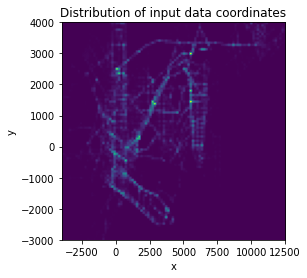

In [49]:
heatmap, xedges, yedges = np.histogram2d(x, y, bins=100, range=[[-4000, 12500], [-3000, 4000]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

f = plt.figure()
f.set_figwidth(4)
f.set_figheight(4)
#plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower', aspect='auto')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distribution of input data coordinates')
plt.show()

In [45]:
plt.clf?